In [1]:
import numpy as np
import matplotlib.pyplot as plt
from homework0 import transfermatrix, bragg, spectrum, field, timeanimation

In [2]:
#Task 1
n1 = np.sqrt(2.25)
n2 = np.sqrt(15.21)
d1 = 0.13
d2 = 0.05
N = 20
epsilon, thickness = bragg(n1, n2,d1, d2, N)

wavelength = 0.78
kz = 0.0
polarisation = 'TE'
M = transfermatrix(thickness, epsilon, polarisation, wavelength, kz)
print('M = {0}'.format(M))
print('det(M) = {0}'.format(np.linalg.det(M)))
print('eig(M) = {0}'.format(np.linalg.eig(M)[0]))

M = [[ 5.01802754e-09+0.j -2.91999214e-09+0.j]
 [ 1.10842951e-06+0.j  1.99281489e+08+0.j]]
det(M) = (0.9999999999999982+0j)
eig(M) = [5.01802754e-09+0.j 1.99281489e+08+0.j]


/Users/wujianyang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


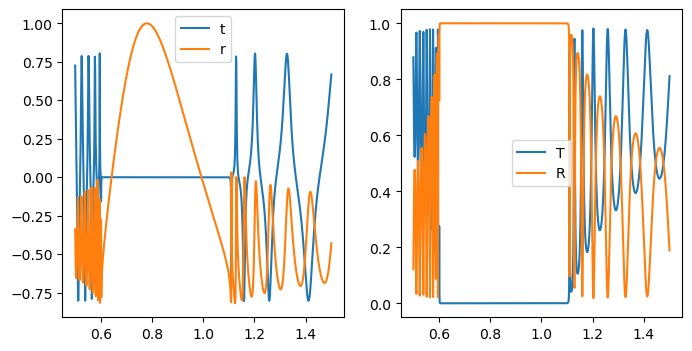

In [3]:
n_in = 1.
n_out = 1.5
angle_inc = 0
wavelength_vector = np.linspace(0.5, 1.5, 1001)
t, r, T, R = spectrum(thickness, epsilon, polarisation, wavelength_vector, angle_inc, n_in, n_out)
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(wavelength_vector, t, label='t')
ax[0].plot(wavelength_vector, r, label='r')
ax[0].legend()
ax[1].plot(wavelength_vector, T, label='T')
ax[1].plot(wavelength_vector, R, label='R')
plt.legend()

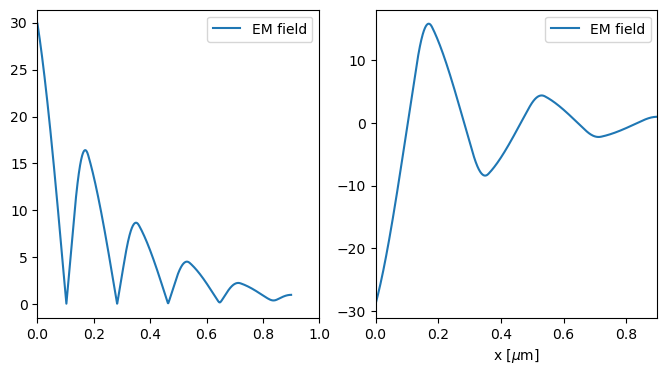

In [22]:
# field distribution

l_in = 0
l_out = 0
Nx = 1001
wavelength = 1.
kz = 0
f, index, x = field(thickness, epsilon, polarisation, wavelength, kz, n_in ,n_out, Nx, l_in, l_out)
fig, ax = plt.subplots(1, 2, figsize = (8,4))
plt.xlim(x[[0,-1]])
plt.xlabel(r'x [$\mu$m]')
# ax[0].plot(x, index.real, label='refr. index')
ax[0].plot(x, np.abs(f), label='EM field')
ax[0].legend()
ax[0].set_xlim(0.0, 1.0)
# ax[1].plot(x, index.real, label='refr. index')
ax[1].plot(x, f.real, label='EM field')
ax[1].legend()
# ax[1].set_xlim(1.0, 2.0)
# ax[1].set_ylim(-130, 50)

In [20]:
f_n = f.real
print(f_n[0],f_n[-1])
for i in range(6):
    print(format(f.real[200*i]/np.abs(f.real).max(),'.6f'))

-28.878819312081053 1.0
-1.000000
0.531170
-0.281534
0.148078
-0.075728
0.034627


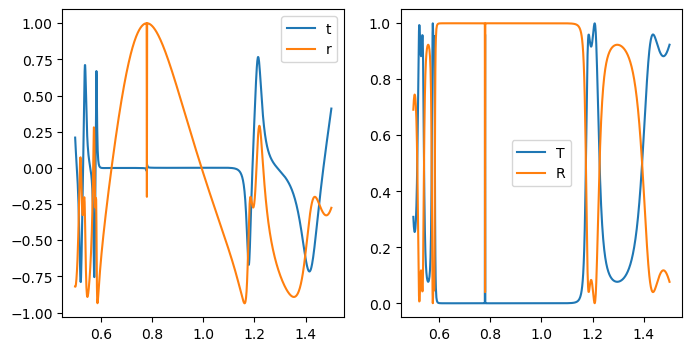

In [5]:
#Task 2, Fabry-Perot resonator
epsilon, thickness = bragg(n1, n2, d1, d2, N*2)
thickness[N*2] = 2*thickness[N*2]
t, r, T, R = spectrum(thickness, epsilon, polarisation, wavelength_vector, angle_inc, n_in, n_out)
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(wavelength_vector, t, label='t')
ax[0].plot(wavelength_vector, r, label='r')
ax[0].legend()
ax[1].plot(wavelength_vector, T, label='T')
ax[1].plot(wavelength_vector, R, label='R')
ax[1].legend()

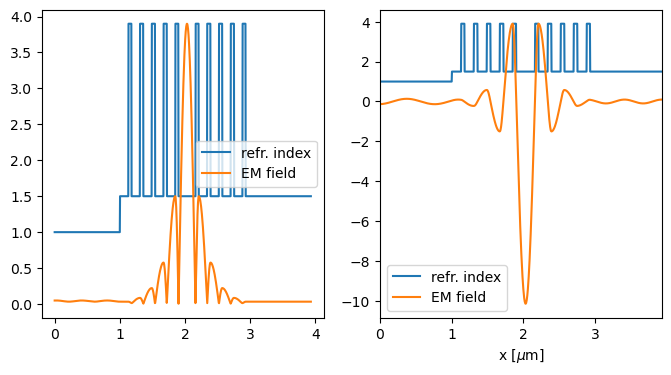

In [6]:
f, index, x = field(thickness, epsilon, polarisation, wavelength, kz, n_in ,n_out, Nx, l_in, l_out)
fig, ax = plt.subplots(1, 2, figsize = (8,4))
plt.xlim(x[[0,-1]])
plt.xlabel(r'x [$\mu$m]')
ax[0].plot(x, index.real, label='refr. index')
ax[0].plot(x, np.abs(f)/np.abs(f).real.max()*index.max(), label='EM field')
ax[0].legend()
ax[1].plot(x, index.real, label='refr. index')
ax[1].plot(x, f.real/f.real.max()*index.max(), label='EM field')
ax[1].legend()

/Users/wujianyang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
MovieWriter ffmpeg unavailable; using Pillow instead.
/Users/wujianyang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


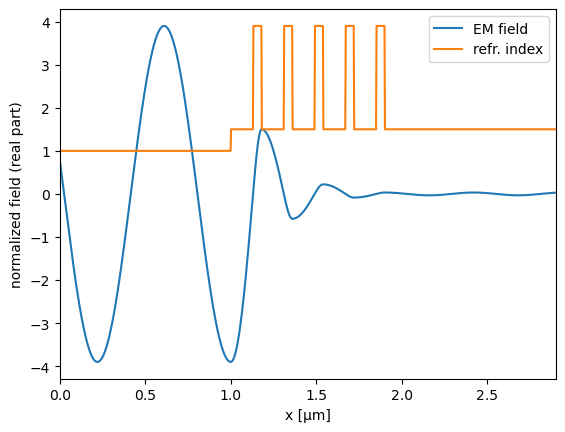

In [6]:
steps = 200
periods = 10
ani = timeanimation(x, f, index, steps, periods)
ani.save("My animation.gif")

In [24]:
np.linalg.inv(M)

array([[-2.18692384-0.j, -0.0468227 -0.j],
       [10.81364323+0.j, -0.22573994+0.j]])